In [51]:
from dask.distributed import Client
client = Client() 
client

/Users/rouquet/anaconda3/lib/python3.6/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


Client Scheduler: tcp://127.0.0.1:51619 Dashboard: http://127.0.0.1:51620/status,Cluster Workers: 4 Cores: 8 Memory: 17.18 GB


In [3]:
from time import sleep
# une fonction qui ajoute 1 après 1 seconde d'attente
def inc(x):   
    sleep(1)   
    return x+1

# une fonction qui fait une addition de 2 nombres
def add(x,y):   
    sleep(1)   
    return x+y
#%%time
x=inc(1)
y=inc(2)
z=add(x,y)
z

5

In [12]:
from dask import delayed
import graphviz

In [6]:
x=delayed(inc)(1)
y=delayed(inc)(2)
z=delayed(add)(x,y)

Delayed('add-62d1d724-ee96-4550-b5ab-74c2544c0c7e')

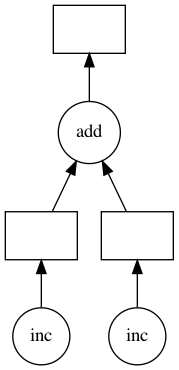

In [14]:
z.visualize()

In [15]:
%%time
res=[]
for i in range(8):
    j=inc(i)    
    res.append(j)
total=sum(res)
total

CPU times: user 275 ms, sys: 48.9 ms, total: 324 ms
Wall time: 8.03 s


In [25]:
%%time
res=[]
for i in range(8):
    j=delayed(inc)(i)    
    res.append(j)
total=delayed(sum)(res)
total

CPU times: user 2.38 ms, sys: 1.38 ms, total: 3.76 ms
Wall time: 3.96 ms


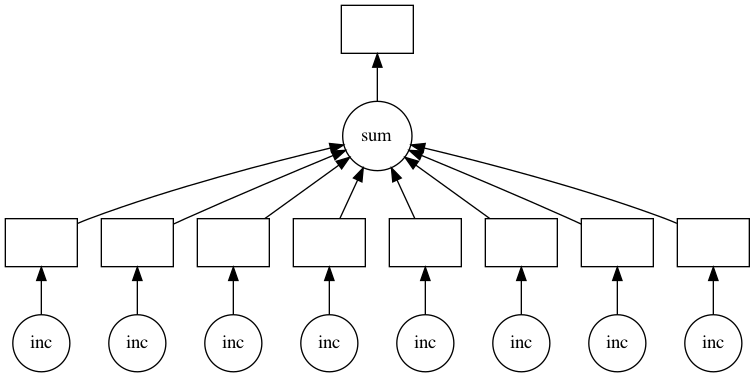

In [26]:
total.visualize()

In [29]:
total.compute()

36

In [40]:
# Définissons la fonction double
def double(x):    
    return(x*2)
# Définissons la fonction is_even pour les nombres pairs
def is_even(x):    
    return not x % 2 # 1 pour True

In [49]:
# Solution :
results = []
for x in range(8):    
    if is_even(x):  # even        
        y = delayed(double)(x)    
    else:          # odd        
        y = delayed(inc)(x)    
    results.append(y)
total = delayed(sum)(results)

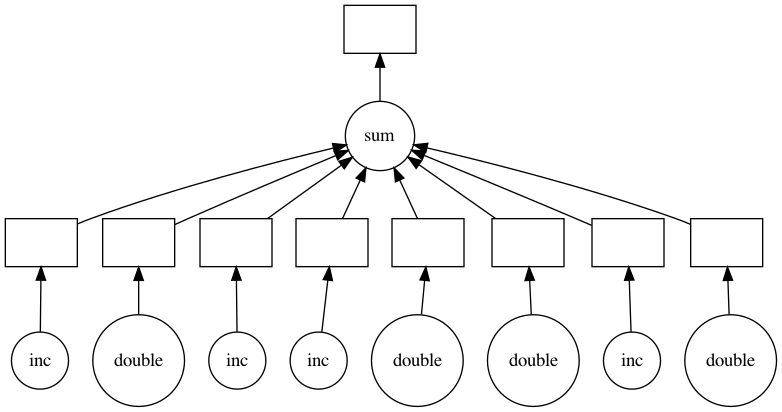

In [50]:
total.visualize()

In [46]:
total.compute()

20

In [53]:
import numpy as np
np.arange(10000000)

array([      0,       1,       2, ..., 9999997, 9999998, 9999999])

In [54]:
fut = client.submit(np.arange, 10000000)
fut

<Future: pending, key: arange-436b8a169bb4f9098a547c8dd08c2ac7>

In [55]:
fut

<Future: finished, type: numpy.ndarray, key: arange-436b8a169bb4f9098a547c8dd08c2ac7>

In [56]:
fut.result()

array([      0,       1,       2, ..., 9999997, 9999998, 9999999])

In [58]:
total = client.submit(np.sum, fut)
print(total)
print(total)
print(total)
print(total)

<Future: finished, type: numpy.int64, key: sum-61b87666d7150f27cb037fda6eb52adf>
<Future: finished, type: numpy.int64, key: sum-61b87666d7150f27cb037fda6eb52adf>
<Future: finished, type: numpy.int64, key: sum-61b87666d7150f27cb037fda6eb52adf>
<Future: finished, type: numpy.int64, key: sum-61b87666d7150f27cb037fda6eb52adf>


In [59]:
total.result()

49999995000000

In [61]:
%%time
x=0
y=0
for i in range(5) :
    x = inc(x)    
    y = add(x,y)
y

CPU times: user 696 ms, sys: 137 ms, total: 833 ms
Wall time: 10 s


In [68]:
%%time
x=0
y=0
for i in range(5) :
    x = delayed(inc)(x)    
    y = delayed(add)(x,y)

CPU times: user 2.42 ms, sys: 2.21 ms, total: 4.62 ms
Wall time: 2.92 ms


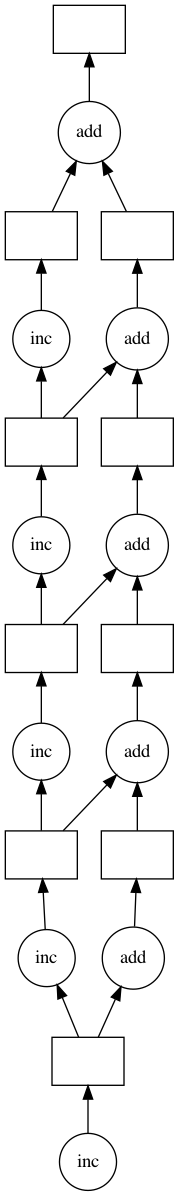

In [69]:
y.visualize()

In [80]:
%%time
x=0
y=0
for i in range(5) :
    x = client.submit(inc, x)   
    y = client.submit(add,x,y)
y

CPU times: user 5.08 ms, sys: 2.33 ms, total: 7.42 ms
Wall time: 5.91 ms


In [81]:
print(y)

<Future: finished, type: builtins.int, key: add-2b9b8e48629937630ce365d1b4f22fae>


In [83]:
%%time
y.result()

CPU times: user 7.01 ms, sys: 3.08 ms, total: 10.1 ms
Wall time: 11 ms


15